In [1]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.api import acf
import matplotlib.pyplot as plt

In [2]:
def plot_times_series(times, series, start=0, end=None, yscale=None):
    plt.figure(figsize=(12,6))
    plt.plot(times[start:end], series[start:end])
    plt.xlabel("time")
    plt.ylabel("value")
    if yscale is not None:
        plt.yscale(yscale)
    plt.grid(True)
    
def trend(times, slope=0):
    return times*slope

def seasonality(times, period='Y', amplitude=10):
    if period =='Y':
        return amplitude*np.cos(2*np.pi*(times%365)/365)
    if period == 'M':
        return amplitude*np.cos(2*np.pi*(times%30)/30)
    
def white_noise(times, noise_level=1, seed=None):
    np.random.seed(seed)
    return np.random.randn(len(times))*noise_level

def autocorrelation(times, amplitude, seed=None, *phis):
    np.random.seed(seed)
    a = np.random.randn(len(times))
    times_series_formula = "a[t] = "
    for i, phi in enumerate(phis):
        if i == 0:
            times_series_formula += f"{phi}*a[t-{i+1}]"
        else:
            times_series_formula += f" + {phi}*a[t-{i+1}]"

    for t in range(len(phis), len(times)):
        a[t] = 0
        for i, phi in enumerate(phis):
            a[t] += phi*a[t - (i+1)]
        
    print(times_series_formula)
    return amplitude*(a)

def random_walk(times, seed=None):
    np.random.seed(seed)
    a = np.zeros(len(times))
    for t in range(1,len(times)):
        a[t] = a[t-1] + np.random.randn()
    return a

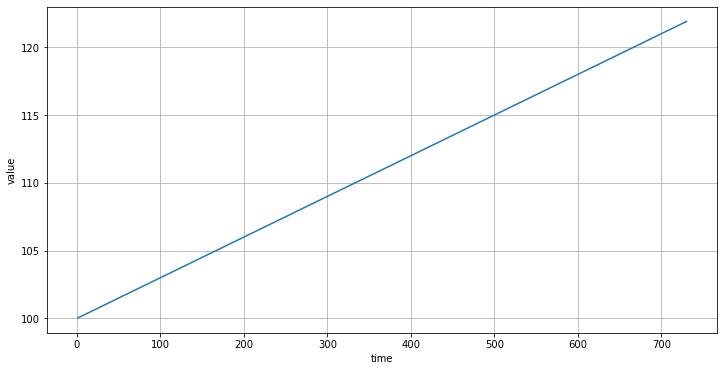

In [3]:
# trend only
times = np.arange(1,2*365+1)
baseline = 100
series = baseline + trend(times, 0.03)

plot_times_series(times, series)

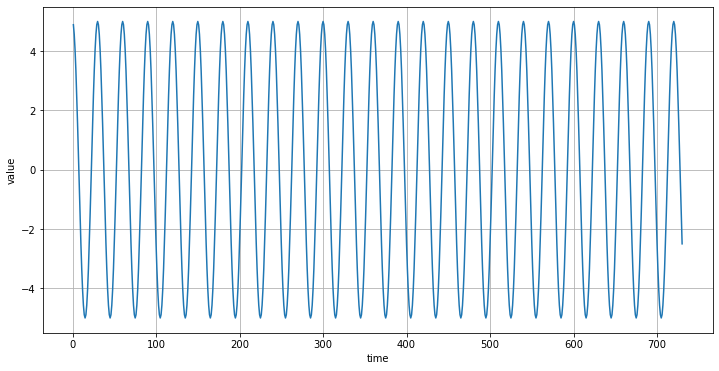

In [4]:
# seasonality only
times = np.arange(1,2*365+1)
series = seasonality(times, period='M', amplitude=5)
plot_times_series(times, series)

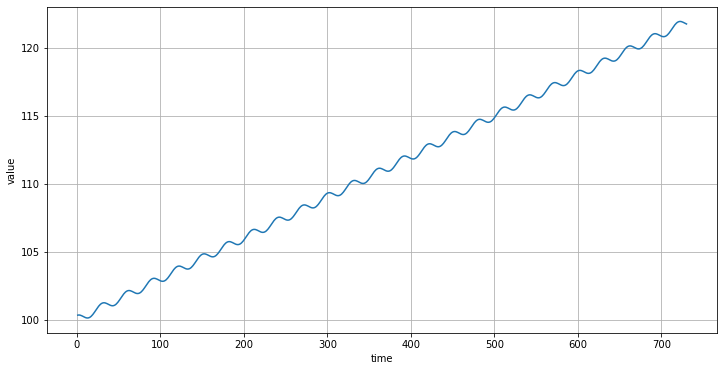

In [5]:
# trend + seasonality
times = np.arange(1,2*365+1)
baseline = 100
trend_series = trend(times, 0.03)
seasonality_series = seasonality(times, period='M', amplitude=0.3)
series = baseline + trend_series + seasonality_series

plot_times_series(times, series)

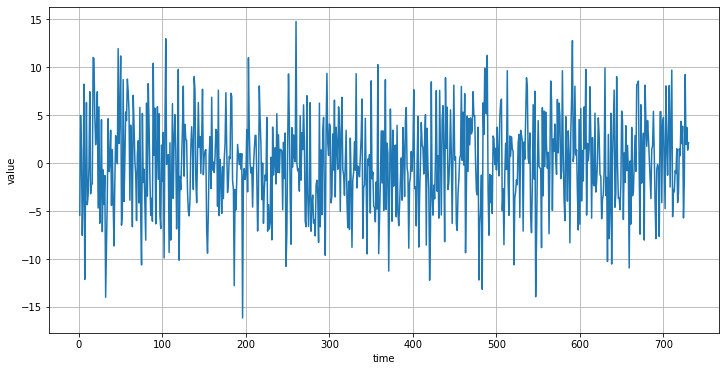

In [6]:
# noise only
series_noise = white_noise(times, noise_level=5, seed=123)

plot_times_series(times, series_noise)

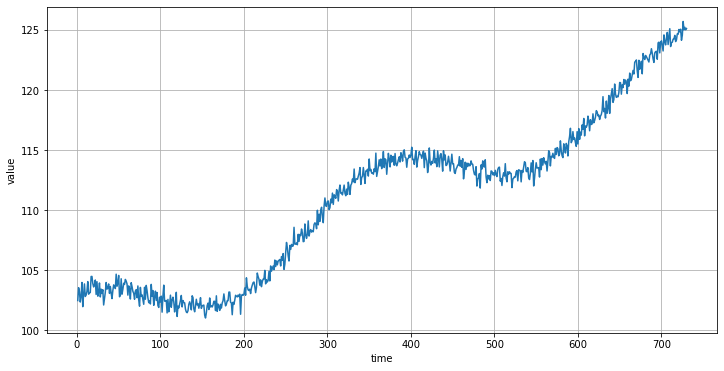

In [7]:
# trend + seasonality + noise
times = np.arange(1,2*365+1)
baseline = 100
trend_series = trend(times, 0.03)
seasonality_series = seasonality(times, period='Y', amplitude=3)
series_noise = white_noise(times, noise_level=0.5, seed=123)
series = baseline + trend_series + seasonality_series + series_noise

plot_times_series(times, series)

a[t] = 


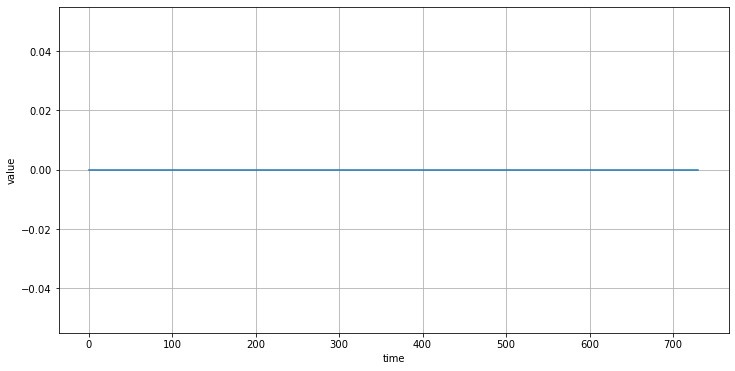

In [8]:
# autocorrelation only
series_autocorrelation = autocorrelation(times, amplitude=1, seed=123)
plot_times_series(times, series_autocorrelation)

a[t] = 


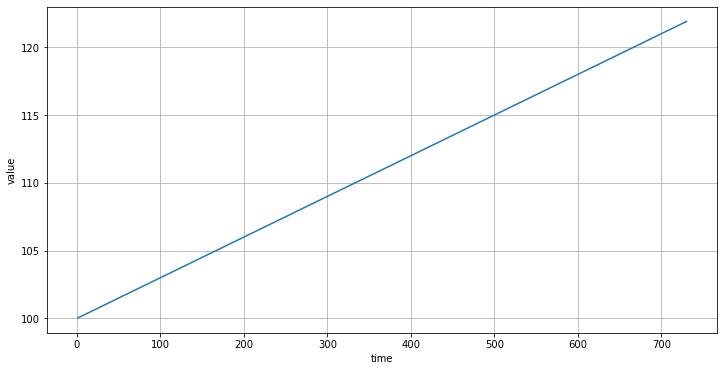

In [9]:
# trend + autocorrelation
times = np.arange(1,2*365+1)
baseline = 100
trend_series = trend(times, 0.03)
series_autocorrelation = autocorrelation(times, amplitude=0.3, seed=123)
series = baseline + trend_series + series_autocorrelation

plot_times_series(times, series)

a[t] = 


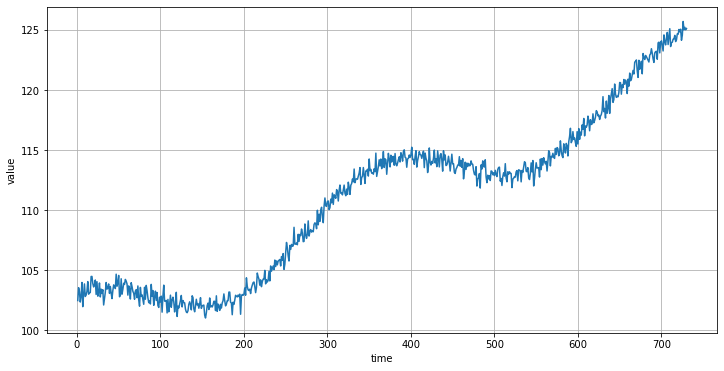

In [10]:
# trend + seasonality + noise + autocorrelation
times = np.arange(1,2*365+1)
baseline = 100
trend_series = trend(times, 0.03)
seasonality_series = seasonality(times, period='Y', amplitude=3)
series_noise = white_noise(times, noise_level=0.5, seed=123)
series_autocorrelation = autocorrelation(times, amplitude=0.3, seed=123)
series = baseline + trend_series + seasonality_series + series_noise + series_autocorrelation

plot_times_series(times, series)

## ACF
Autocorrelation Coefficient (ACF) $r_{k}$ is defined as:
$$
r_{k} = \frac{\sum\limits_{t=k+1}^N (a[t]-\bar{a})(a[t-k]-\bar{a})}
 {\sum\limits_{t=1}^N (a[t]-\bar{a})^2},
 $$
where
$$
\bar{a} = \frac{1}{N} \sum\limits_{t=1}^N a[t].
$$.

The autocorrelation $r_{k}$ determines the autocorrelation strength and signiture between $a[t]$ and $a[t-k]$.

**Special case**: when a times series is produced such that $a[t] = \alpha\times a[t-1]$ and $0<\alpha<1$, and $N$ is large engouth, then for small $k$s we will have:

$$
r_{k} \approx \alpha^k
$$

a[t] = 0.5*a[t-1]


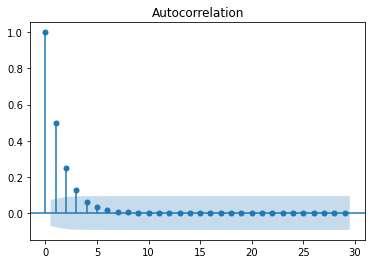

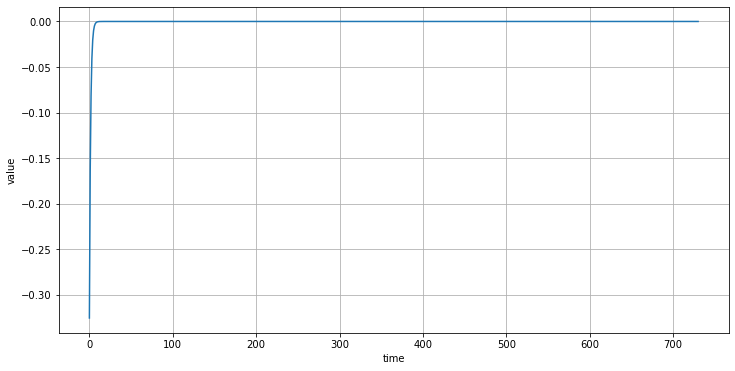

In [11]:
times = np.arange(2*365+1)
series = autocorrelation(times, 0.3, 123, 0.5)
_ = plot_acf(series)
plot_times_series(times, series)

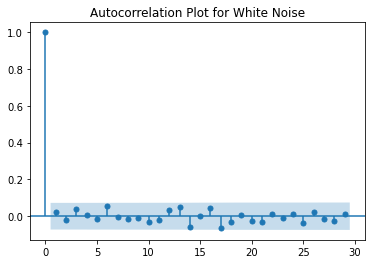

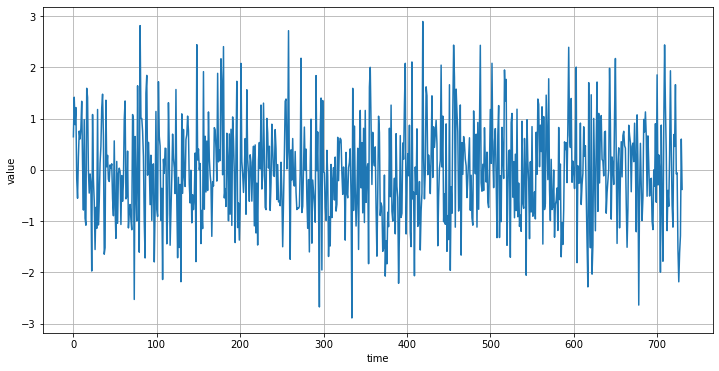

In [12]:
# ACF Plot for white nosie
times = np.arange(2*365+1)
noise_series = white_noise(times)
_ = plot_acf(noise_series, title="Autocorrelation Plot for White Noise", zero=True)
plot_times_series(times, noise_series)

## Random Walk


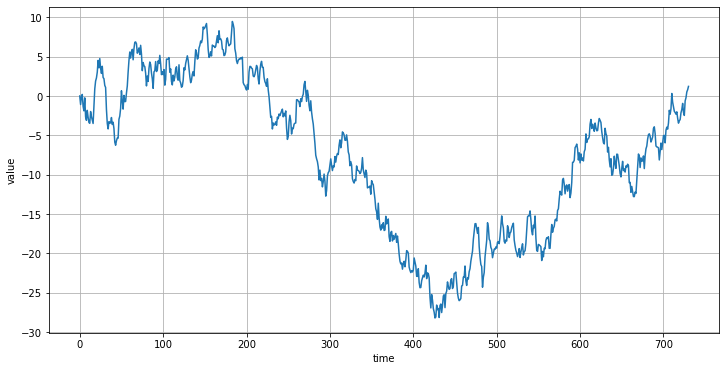

In [13]:
times = np.arange(2*365+1)
random_walk_series = random_walk(times, seed=123)
plot_times_series(times, random_walk_series)

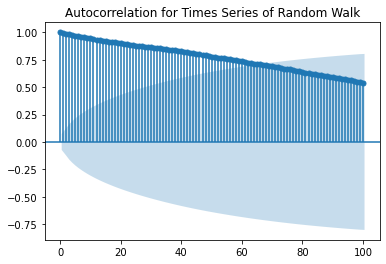

In [14]:
_ = plot_acf(random_walk_series, title="Autocorrelation for Times Series of Random Walk", lags=100)

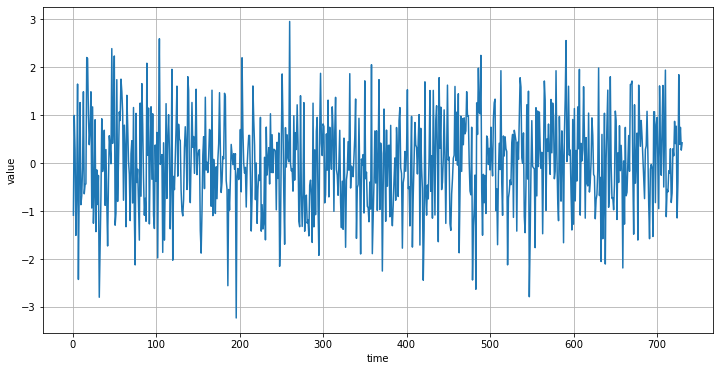

In [15]:
random_walk_difference_series = random_walk_series[1:] - random_walk_series[0:len(random_walk_series)-1]
plot_times_series(times[1:], random_walk_difference_series)

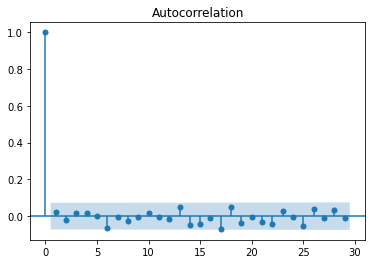

In [16]:
_ = plot_acf(random_walk_difference_series)